# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Resampling and interpolation

<br></font>
</div>

# Import modules

In [11]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

### Reading in the dataset

In [8]:

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../DATASETS/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
print(series.head(32))

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
Name: Sales, dtype: float64


### Upsampling the data

<div class="alert alert-block alert-info">
<font color=black><br>

- The observations in the Shampoo Sales are monthly. 
- Imagine we wanted daily sales information. 
- We would have to upsample the frequency from monthly to daily and use an interpolation scheme to fill in the new daily frequency.

<br></font>
</div>

In [9]:
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


<div class="alert alert-block alert-info">
<font color=black><br>

- We can see that the resample() function has created the rows by putting NaN values in the new values. 
- We can see we still have the sales volume on the first of January and February from the original data. ext, we can interpolate the missing values at this new frequency. 
- The Series Pandas object provides an interpolate() function to interpolate missing values, and there is a nice selection of simple and more complex interpolation functions.

<br></font>
</div>

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


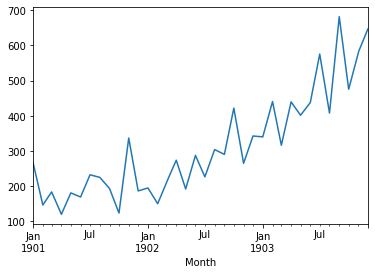

In [12]:
interpolated = upsampled.interpolate(method='linear') 
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


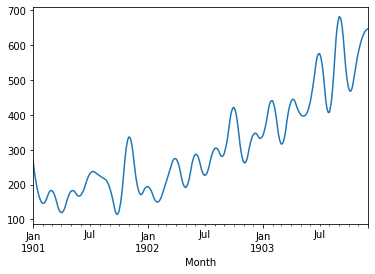

In [14]:
interpolated = upsampled.interpolate(method='spline', order=2) 
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

<br></font>
</div>